# Analisi dati spettri XPS-SuperESCA

Apriamo cartella `FILE Lezione IGOR_3` ---> cartella C 1s $ \\ $ 
Per ogni spettro vengono generati automaticamente 3 file: $ \\ $ 

## High resolution XPS 
* SE0511_053.itx:  SE sta per "super esca"; "05/11" è la data; "053" è il 53 esimo spettro acquisito.
* SE0511_053_AllX.itx: contiene tutti i parametri dello spettro(corrente, pressione, temperatura, energia dei fotoni,...).
* SE0511_053_P.itx: sono i file parziali.

## Time Resolved-XPS 
* SE0511_054.itx:  SE sta per "super esca"; "05/11" è la data; "054" è il 54 esimo spettro acquisito.
* SE0511_054_AllX.itx: contiene tutti i parametri dello spettro(corrente, pressione, temperatura, energia dei fotoni,...).
* SE0511_054_2D.itx: plot 2D ottenuto dagli spettri parziali.

# File Carbonio 1s

Apriamo su IGOR lo spettro `SE0511_053.it`, quello che vediamo è questo: 
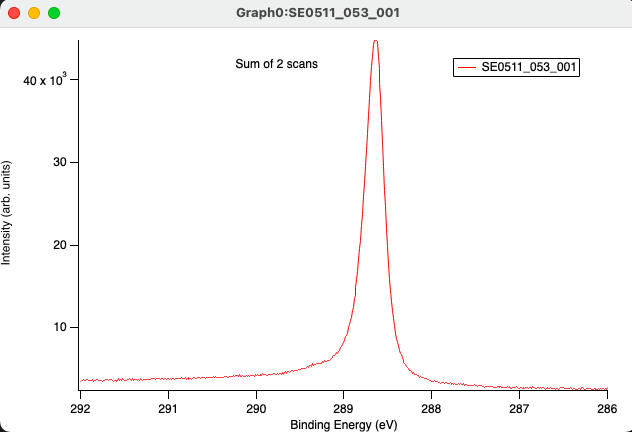 
$ \\ $
Questo è lo spettro del `livello di core del carbonio 1s`. Notiamo la scritta "sum of 2 scans" che sta a significare il fatto che lo spettro è dato dalla somma di due scansioni. $ \\ $ 

$ \underline{nota} $ : bisogna stare attenti che quando si acquisiscono più scan, per avere una migliore statistica degli spettri, quelli che vengono salvati a SuperESCA, non sarà lo spettro dato dalla media totale ma sarà lo spettro somma. $ \\ $ 
Adesso aprimiamo il file `SE0511_053AllX.it`, quello che succede è che si aprono tutta un serie di wave: $ \\ $ 
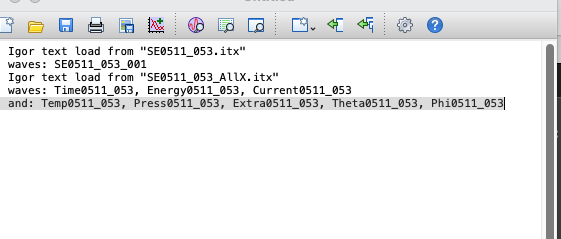 

* Time0511_053: aprendolo, ci dice che il primo spettro è stato acquisito al tempo $ t = 0 $ secondi, mentre il secondo è stato acquisito al tempo $ t = 82.939 $ secondi.
* Energy0511_053: ci dice l'energia dei fotoni utilizzati per acquisire lo spettro dei livelli di core del carbonio 1s; aprendolo, vediamo che entrambi gli scan sono stati eseguiti a $ 400 eV $.
* Current0511_053: parametro molto importante per la normalizzazione degli spettri! Perchè la quantità di segnale che abbiamo è proporzionale al flusso di fotoni che si hanno a disposizione. Questo perchè: per quanto il sincrotrone sia stabile, potremmo avere in questo momento una certa quantità di fotoni e invece tra mezzora avere un'altra quantità di fotoni. Questa disparità non è facile da vedere semplicemente osservando gli spettri presi. Quando andremo però a confrontare due spettri presi in momenti diversi, per confrontare le aree di questi segnali, è importante tenere conto di quanti fotoni stavano arrivando sul campione in quel momento per poter normalizzare. $ \\ $ 

Aprendo il file osserviamo due valori di corrente: $ 1.70376e-08 A $ $ \quad $   e $ \quad $ $ 1.710134e-08 A $. Questi due valori sono dati in ampere e, solitamente, per praticità, si normalizza in `nanoampere`. Cioè: $ \\ $ 

* spettro / $ 1.70376e-08 A $ $ \quad $ NO! OPERAZIONE SBAGLIATA! 

* spettro /  $17.0376$ nA $\quad$ SI'! OPERAZIONE CORRETTA! 

# Normalizzazione numero di scan e corrente 

1. `normalizzazione numero di scan`$ \\ $ 
* comando su terminale IGOR: $ \quad $   `SE0511_053_001 /=2 ` $ \\ $ 
( "/=" indicano "stessa wave diviso qualcosa" in questo caso 2, cioè il numero di scan) $ \\ $ 

2. `normalizzione corrente` siccome non avremo solo un singolo valore di corrente ma due, cinque o dieci, bisogna prenderne il valor medio. In questo caso devo prendere il valore medio di $ 1.70376e-08 A $ $ \quad $   e $ \quad $ $ 1.710134e-08 A $. Allora, la lista di comandi è la seguente: $ \\ $ 

* comando su terminale IGOR: $ \quad $ `wavestats Current0511_053` $ \\ $ 
e visualizziamo sul terminale IGOR: $ \\ $ 
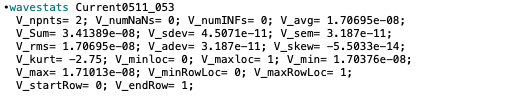 
$ \\ $ 
A noi interessa il parametro `V_avg=1.70695e-08` che è la media dei due valori di corrente. $ \\$
* comando su terminale IGOR: $\quad$ `SE0511_053_001/=17.0695` $ \\ $ 

Così facendo il nostro nuovo spettro sulle intensità, non ha più circa 30 000 conteggi, ma ora abbiamo circa 1200 conteggi al massimo:$ \\ $
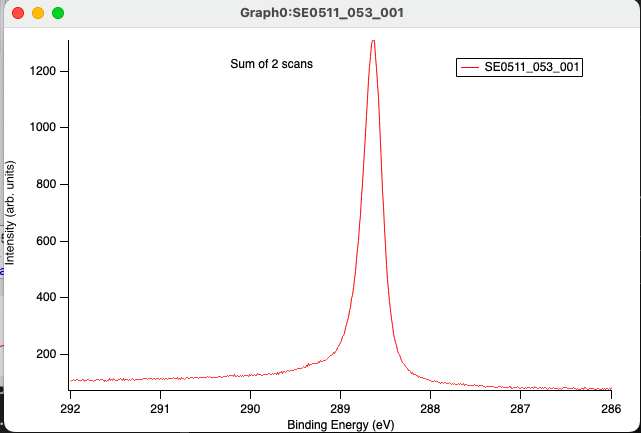

# Normalizzazione livello di Fermi 

$\textbf{regola generale}$: vogliamo sempre esprimere i livelli di core rispetto al livello di Fermi del campione. $\\$

Per questo motivo, dopo ogni spettro del livello di core, viene acquisito uno spettro del livelo di Fermi. In questo caso è lo spettro `SE0511_054.itx`: $ \\ $
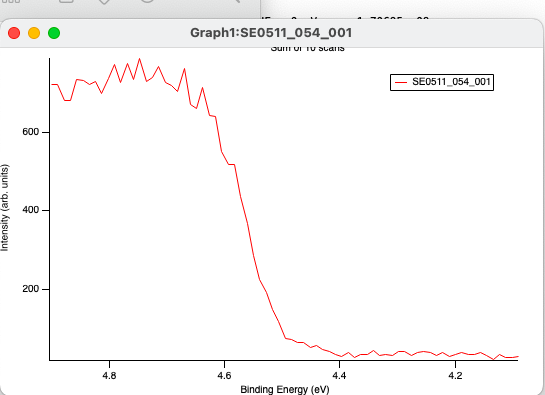 
$ \\ $ 
Quindi pe normalizzare l'asse del binding energy vogliamo effettuare un fit del livello di Fermi, trovare dove si trova esattamente il livello di Fermi e dopodichè sottrarre questo numero allo spettro dei livelli di core. $ \\ $

## Procedure: "Fermi_edge" 

1. Data -----> Change Wave Scaling ----> from target (attivare spunta) ---> selezionare SE0511_054_001 ---> doppio click su questa wave ---> cambiare il segno positivo dello start in un segno negativo e cambiamo il segno negativo del delta con un segno positivo ---> Do it ---> la funzione si ribalta ---> doppio click sulla asse delle x ---> andare in Axis Range ---> togliere la spunta a Reverse axis ---> Do it

2. data analysis ----> curve fitting ------>Function and data ---> Function: Fermi_edge -----> from target (attivare spunta) $ \\ $

3. Output options ----> Residual: selezionare "auto trace" $ \\ $ 

4. Coefficients ----> nota: il parametro W4, solitamente, ha un valore pari al max del valore dell'asse delle y ----> parametri: $ \\ $

* W0 = 20 $\quad$ intercetta lineare del background

* W1 = 0 $\quad$ slope lineare del background

* W2 = 300 $\quad$ temperatura assoluta (es 300 K)

* W3 = 0.1 $\quad$ larghezza della convoluzione Gaussiana(2.35482*sigma)

* W4 = 700/800 $\quad$ larghezza del Fermi roll-off(valore pari al massimo valore dell'asse delle y)

* W5 = -4.59 $\quad$ energia di Fermi

Il fit è il seguente: $ \\ $ 
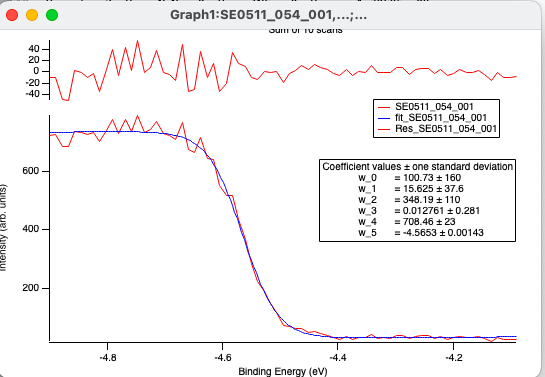
$ \\ $ 

Quello che vogliamo fare ora è tornare al nostro spettro del carbonio 1s e correggere l'asse delle x in funzione del nuovo livello di Fermi trovato (cioè il W5). $ \\ $ 
Per fare questo però dobbiamo di nuovo cambiare lo scaling e andare a valori negativi, quindi: $ \\ $ 

5. Data -----> Change Wave Scaling ----> from target (attivare spunta) ---> selezionare SE0511_053_001 ---> doppio click su questa wave ---> cambiare il segno positivo dello start in un segno negativo e cambiamo il segno negativo del delta con un segno positivo ---> Do it ---> la funzione si ribalta ---> doppio click sulla asse delle x ---> andare in Axis Range ---> togliere la spunta a Reverse axis ---> Do it

6. correggiamo con il livello di Fermi: $ \\ $ 

* comando su terminale IGOR: $ \quad $ `print 292 - 4.5653` -----> ottengo valore:  $287.435$
 $ \\ $ 

7. copio $287.435$ ----> Data ----> Change Wave Scaling ----> selezionare SE0511_053_001 ---> doppio click su questa wave ----> cambiare il $-292$ con $-287.435$ ---> Do it
$ \\ $ 

Quindi, il nostro spettro del carbonio 1s, normalizzato per il numero di scan, intensità di corrente e livello di Fermi, è il seguente: $ \\ $ 
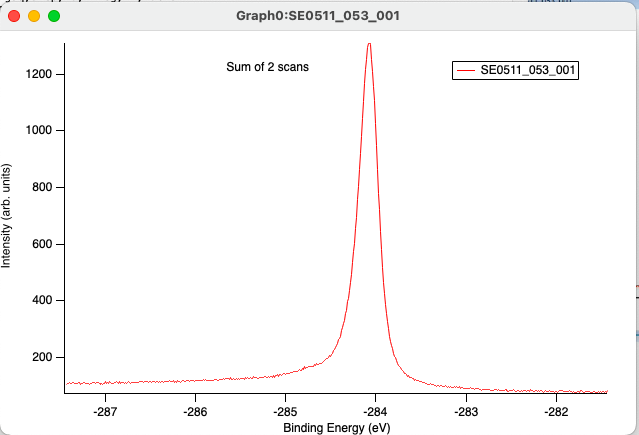
$ \\ $

Adesso il nostro spettro è pronto per essere analizzato facendo un fit con una funzione di Doniach-Sunijc convoluta con una Gaussiana che è la forma di riga con la quale si analizzano i livelli di core

# Fit spettri convoluti con Doniach Sunijc e Gaussiana

Torniamo allo spettro 1s del carbonio appena normalizzato: $ \\ $

1. creiamo una wave 0 con 7 parametri tutti uguali a zero $ \\ $

2. data analysis ----> curve fitting ------>Function and data ---> Function: dsgn -----> from target (attivare spunta) $ \\ $

3. Coefficients -----> Coefficients Wave ----> selezionare wave 0 ---> parametri: $ \\ $

* W0 = 100 $\quad$ Intercetta del background alla posizione del picco

* W1 = 0 $\quad$ Background slope

* W2 = 0.1 $\quad$ FWHM Lorentziana

* W3 = 0.1 $\quad$ Parametro di asimmetria(cioè $\alpha$, vedi appunti Baraldi)

* W4 = 0.2 $\quad$ FWHM Gaussiana

* W5 = 2000 $\quad$ Intensità

* W6 = -284.05 $\quad$ Binding energy
$ \\ $ 

Otteniamo quindi: $ \\ $ 
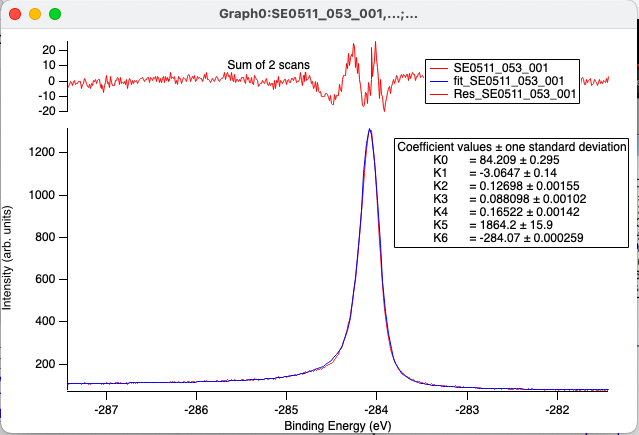
$ \\ $ 

La presenza di quei due picchetti sui residui indica che il residuo non è perfetto; in particolare, non lo è in presenza del massimo nè tantomeno nelle vicinanze della curva a $284.5$ eV. Questo è tipico dei fit sul carbonio 1s perchè, in realtà, il graphene può avere dei difetti, non tutti gli atomi di carbonio sono equivalenti (cella di Moirè, corrugazione graphene,...).

# Multiple peaks fitting

Andiamo nella cartella "Ir 4f" e prendiamo lo spettro `SE0223_074.itx`. A differenza dello spettro per il carbonio 1s, questo spettro presenta due picchi multipli che non posso fittare con la precedente funzione di fit. Per prima cosa devo sempre eseguire normalizzazione in funzione dello scan, della corrente e del livello di Fermi. $ \\ $ 

1. creiamo una wave 1 con 8 parametri tutti uguali a zero: $ \\ $

2. data analysis ----> curve fitting ------>Function and data ---> Function: dsgnmEas -----> from target (attivare spunta) $ \\ $

3. Coefficients -----> Coefficients Wave ----> selezionare wave 1 ---> parametri: $ \\ $

* W0 = 10 $\quad$ Intercetta del background alla posizione del picco 1 

* W1 = 0 $\quad$ Background slope

* W2 = 0.1 $\quad$ FWHM Lorentziana

* W3 = 0.2 $\quad$ Parametro di asimmetria(cioè $\alpha$, vedi appunti Baraldi)

* W4 = 0.3 $\quad$ FWHM Gaussiana

* W5 =80 $\quad$ Intensità del picco 1

* W6 = -61 $\quad$ Binding energy picco 1

* W7 = 50 $\quad$ Intensità del picco 2

* W8= 0.4 $\quad$ Binding energy picco 2 relativa al picco 1 (cioè, W6-W8)

$ \\ $ 

Otteniamo quindi: $ \\ $ 

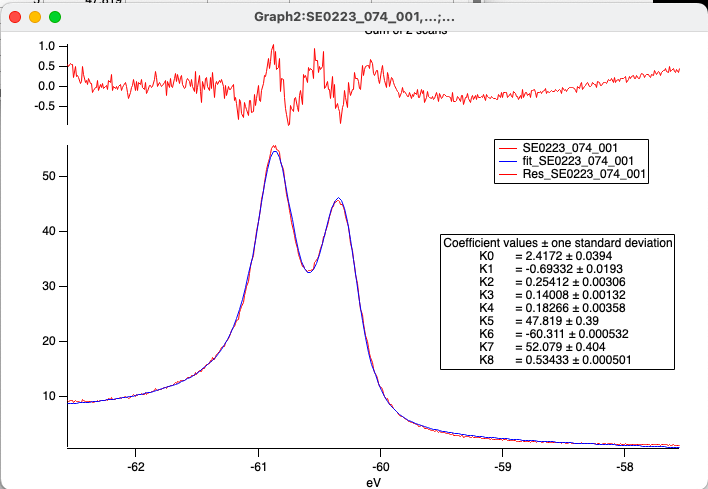

$ \\ $ 

Quello che adesso possiamo fare è salvare il relativo grafico dei residui e andare a fare altri fit con altre funzioni di fit: $ \\ $ 

* comando su terminale IGOR: $ \quad $ `duplicate Res_SE0223_074_001 fit_same_ls` -----> sto duplicando il grafico dei residui e lo sto chiamando "fit_same_ls" (ls = lineshape) $ \\ $ 

* comando su terminale IGOR: $ \quad $ `display fit_same_ls` 

Ottengo: $ \\ $ 

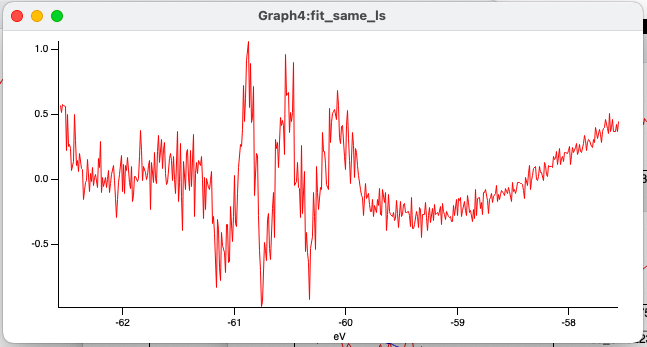
$ \\ $ 

Adesso vogliamo fittare con un'altra funzione di riga che avrà più parametri. $ \\ $ 

4. creiamo una wave 2 con 11 parametri: $ \\ $
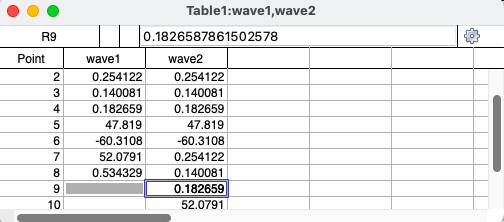
$ \\ $
Abbiamo messo nelle righe 7,8 e 9 della wave 2 gli stessi valori del fit delle righe 2, 3 e 4. Questo è un buon modo per iniziare. $ \\ $ 

5. data analysis ----> curve fitting ------>Function and data ---> Function: dsgnmEad1 -----> from target (attivare spunta) $ \\ $

6. Coefficients -----> Coefficients Wave ----> selezionare wave 2 ---> parametri: $ \\ $

Otteniamo quindi: $ \\ $ 

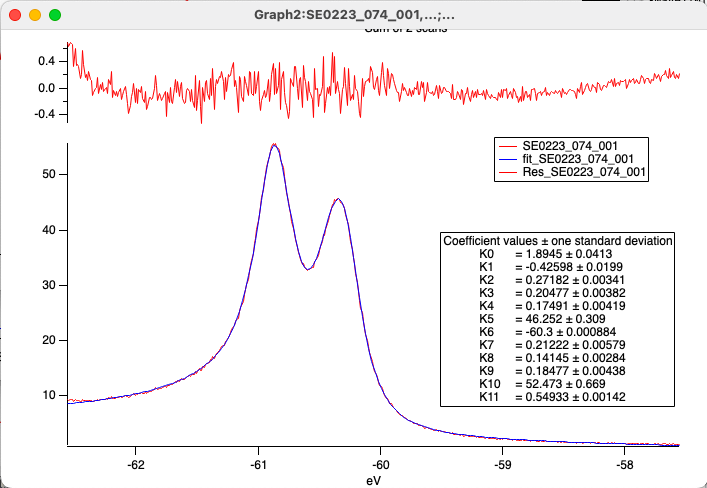

$ \\ $ 

* comando su terminale IGOR: $ \quad $ `duplicate Res_SE0223_074_001 fit_diff_bg` -----> sto duplicando il grafico dei residui e lo sto chiamando "fit_diff_bg" (bg = background) $ \\ $ 

* comando su terminale IGOR: $ \quad $ `append fit_diff_bg` 

Ottengo: $ \\ $ 

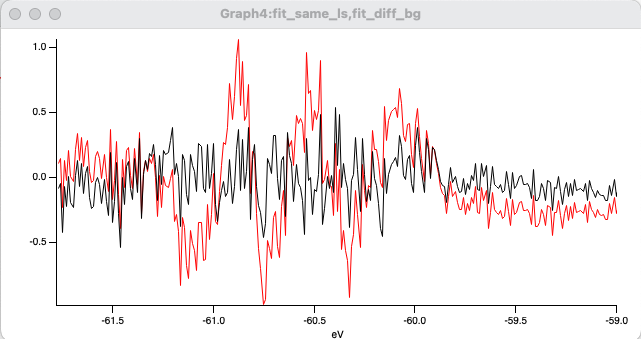

Notiamo che se grafichiamo entrambi i residui, attraverso la funzione di riga, dsgnmEad1, il residuo è nettamente migliorato (residuo in nero)! $ \\ $ 

$ \textbf{Domanda:} $ abbiamo due picchi. Tutti e due i picchi sono originati da atomi di Ir, per quale motivo, la forma di riga di questi due atomi di Ir dovrebbe essere diversa? $ \\ $ 

$ \textbf{Risposta:} $ le ragioni sono molteplici. Una possibile risposta è che: gli elettroni che vede una buca quando sta in un atomo di superficie o in un atomo di bulk, sono diversi. Quindi gli effetti di schermo, e quindi gli stati finali possono essere diversi; e quindi i tempi di riempimento delle buche sono diversi e quindi la larghezza Lorentziana può essere diversa. Inoltre, i fononi che contribuiscono alla larghezza Gaussiana, sono assolutamente diversi tra bulk e superficie. $ \\ $ 

$ \underline{nota:} $ la funzione Doniach-Sunijc, che è la migliore funzione di fit "disponibile sul mercato", utilizzata per analizzare spettri XPS, non è la soluzione universale e valida per tutto, che non porta ad una qualità dei risultati di fit sempre eccelenti come in questo caso. Per fortuna, la funzione Doniach-Sunijc funziona molto bene per L'Ir. Questo perchè Doniach-Sunijc, costruita negli anni '70, fa delle assunzioni riguardo al fatto che la densità di stati al livello di Fermi non cambi con grande rapidità, cioè che la densità di stati sopra e sotto il livello di Fermi non sia troppo diversa. Ciò è vero per alcuni metalli, ma non per tutti, come ad esempio il palladio.